In [0]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras import regularizers
from keras.optimizers import SGD
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
#download here https://github.com/parulnith/Music-Genre-Classification-with-Python
song_spectral_data = pd.read_csv("music_genres_class.csv")

In [166]:
song_spectral_data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843071,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783624,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [0]:
lab_dict = {}
for num, label in enumerate(pd.Series(song_spectral_data.label.unique()).sort_values()):
  lab_dict[label] = num

In [168]:
lab_dict

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [0]:
#one hot encoding genres for output layer
y_array = keras.utils.to_categorical(song_spectral_data.label.map(lab_dict))
#dropiing unneeded columns
X_df = song_spectral_data.drop(columns = ["filename", "label"])
#80-20 split
xtrain, xtest, ytrain, ytest = train_test_split(X_df, y_array, test_size = 0.2, random_state = 0)
#Standardize the inputs to my network
xtrain = preprocessing.StandardScaler().fit_transform(xtrain)
xtest = preprocessing.StandardScaler().fit_transform(xtest)

xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = .2, random_state = 0)

In [0]:
# Key findings after experimentation:
# Network complexity didn't make a huge difference
# Regularization prevented the network from learning (likely due to sparsity of classes)
# Sigmoid made the network learn much less efficiently compared to relu
percep = Sequential()
percep.add(Dense(128, input_dim=26, activation="relu"))
percep.add(Dense(64, activation = "relu"))
percep.add(Dense(10, activation="softmax"))

In [0]:
#SGD. Learning rate of .1, weight regularization of .01, mini batches with size 100
sgd = SGD(lr=0.2, nesterov=False)
percep.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [209]:
train_logs = percep.fit(xtrain,
                    ytrain,
                    epochs=80,
                    batch_size=128,
                    validation_data=(xval, yval))

Train on 640 samples, validate on 160 samples
Epoch 1/80
640/640 [==============================] - 2s 3ms/step - loss: 2.1976 - acc: 0.2375 - val_loss: 1.9217 - val_acc: 0.4125
Epoch 2/80
640/640 [==============================] - 0s 36us/step - loss: 1.8522 - acc: 0.4219 - val_loss: 1.7032 - val_acc: 0.4125
Epoch 3/80
640/640 [==============================] - 0s 25us/step - loss: 1.6492 - acc: 0.4594 - val_loss: 1.5593 - val_acc: 0.4500
Epoch 4/80
640/640 [==============================] - 0s 25us/step - loss: 1.4984 - acc: 0.4672 - val_loss: 1.4464 - val_acc: 0.4625
Epoch 5/80
640/640 [==============================] - 0s 39us/step - loss: 1.4000 - acc: 0.5203 - val_loss: 1.3771 - val_acc: 0.4938
Epoch 6/80
640/640 [==============================] - 0s 29us/step - loss: 1.3171 - acc: 0.5359 - val_loss: 1.3033 - val_acc: 0.5375
Epoch 7/80
640/640 [==============================] - 0s 32us/step - loss: 1.2458 - acc: 0.5766 - val_loss: 1.2462 - val_acc: 0.5312
Epoch 8/80
640/640 [====

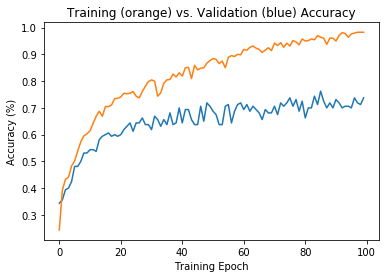

In [206]:
#Well stop at 80, validation accuracy of 0.7125
plt.plot(train_logs.history['val_acc'])
plt.plot(train_logs.history["acc"])
plt.title("Training (orange) vs. Validation (blue) Accuracy")
plt.xlabel("Training Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

In [212]:
#Ok we have trained our model, lets see how well it does on test data. Should be ~70%
print("Test error: {}".format(percep.evaluate(xtest, ytest)[1]))

200/200 [==============================] - 0s 99us/step
Test error: 0.655


In [215]:
#Final predicted classes
[each.argmax() for each in percep.predict(xtest)]

[9,
 8,
 9,
 5,
 6,
 5,
 0,
 2,
 3,
 5,
 8,
 2,
 7,
 2,
 5,
 5,
 0,
 1,
 0,
 0,
 9,
 8,
 9,
 3,
 8,
 7,
 0,
 2,
 4,
 0,
 2,
 7,
 6,
 7,
 2,
 7,
 9,
 9,
 9,
 5,
 2,
 3,
 6,
 4,
 9,
 7,
 8,
 5,
 7,
 5,
 9,
 2,
 5,
 4,
 8,
 5,
 8,
 2,
 8,
 3,
 5,
 6,
 1,
 3,
 3,
 1,
 5,
 5,
 5,
 5,
 7,
 2,
 7,
 2,
 0,
 4,
 5,
 7,
 0,
 6,
 5,
 7,
 3,
 9,
 8,
 6,
 2,
 5,
 4,
 7,
 4,
 4,
 9,
 2,
 0,
 4,
 5,
 1,
 3,
 6,
 8,
 8,
 0,
 9,
 3,
 6,
 6,
 7,
 9,
 2,
 0,
 5,
 4,
 2,
 9,
 3,
 5,
 9,
 4,
 9,
 7,
 0,
 1,
 9,
 0,
 8,
 3,
 0,
 9,
 0,
 4,
 4,
 5,
 7,
 7,
 6,
 9,
 5,
 5,
 8,
 1,
 6,
 5,
 5,
 2,
 4,
 7,
 3,
 0,
 0,
 2,
 0,
 4,
 7,
 9,
 9,
 8,
 3,
 3,
 8,
 1,
 2,
 6,
 7,
 9,
 7,
 9,
 9,
 3,
 4,
 3,
 5,
 1,
 8,
 4,
 7,
 9,
 6,
 8,
 1,
 7,
 5,
 4,
 7,
 9,
 9,
 3,
 4,
 8,
 2,
 7,
 4,
 9,
 0,
 7,
 3,
 7,
 2,
 6,
 1]